# ANALISANDO OS DADOS POR MEIO DO PYTHON
### Antes eu passaria esses diretamente pelo software de visualização, porém, creio agora que é mais facil fazer pelo Python.

In [25]:
# instalando a matplotlib e seaborn para visualização
%pip install -U matplotlib
%pip install -U seaborn
%pip install -U scipy
%pip install -U numpy
# caso a visualização fosse ser criada no python eu instalaria seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### IMPORTANDO AS BIBLIOTECAS NECESSARIAS

In [80]:
import matplotlib.pyplot as plt # visualização
import pandas as pd # manipulação dos dados (dá pra fazer visualização também)
import seaborn as sns # visualização
from scipy.stats import kstest, anderson, norm, probplot #testes para descobrir o tipo de distribuição
import numpy as np

#### Funções

In [81]:
def remove_outlier(df, column):
    # Para remover esses outliers vamos usar o seguinte código

    # Calculate the 5th and 95th percentiles of column 'x'
    lower_bound = df[column].quantile(0.05)
    upper_bound = df[column].quantile(0.95)

    # Truncate the values in column 'x' to the range between the 5th and 95th percentiles
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    
    return df

## DISCOVER DOS DADOS

### CARREGANDO O CSV QUE SERA ANALISADO

In [82]:
coffeeDF = pd.read_csv('data/coffe_etl.csv')
coffeeDF.head()

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,C,Dim Kavu,Others,4.6,206.0,$$,False,False,False
1,C,Коферум,Cafe,5.0,24.0,$$,False,False,True
2,C,Кофейня Світ Чаю,Coffee shop,5.0,11.0,$$,False,False,True
3,C,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,C,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,$$,False,True,True


In [83]:
# Verificando se existe restaurantes com mais de um registro na tabela
coffeeDF.groupby('Place name').count().sort_values(by='Reviews', ascending=False)
# COMPROVADO: existe

,Region,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
Place name,,,,,,,,
Dim Kavy,4,4,4,4,4,4,4,4
Coffee House,3,3,3,3,3,3,3,3
coffee House,3,3,3,3,3,3,3,3
Lviv Coffee Manufacture,2,2,2,2,2,2,2,2
SV Кафе,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...
HOTCUP,1,1,1,1,1,1,1,1
Horizontal kaffee,1,1,1,1,1,1,1,1
Hunter's yard,1,1,1,1,1,1,1,1


### DESCOBRINDO OS "RANGES" DAS COLUNAS NUMERICOS

In [84]:
print(coffeeDF['Rating'].min(),
      coffeeDF['Rating'].max())
# Dava pra descobrir o max e min porém não me atentei no enunciado :p

3.9 5.0


In [85]:
# PRINCIPAL FUNÇÃO NA ANALISE INICIAL
coffeeDF.describe()

,Rating,Reviews
count,198.000000,198.000000
mean,4.663636,622.494949
std,0.221648,1400.898666
min,3.900000,3.000000
25%,4.600000,47.500000
50%,4.700000,271.500000
75%,4.800000,786.250000
max,5.000000,17937.000000


## Análise das distribuições
#### Iremos analisar as distribuições de Rating e Review

#### RATING

(array([ 6.,  8., 34., 86., 64.]),
 array([3.9 , 4.12, 4.34, 4.56, 4.78, 5.  ]),
 <BarContainer object of 5 artists>)

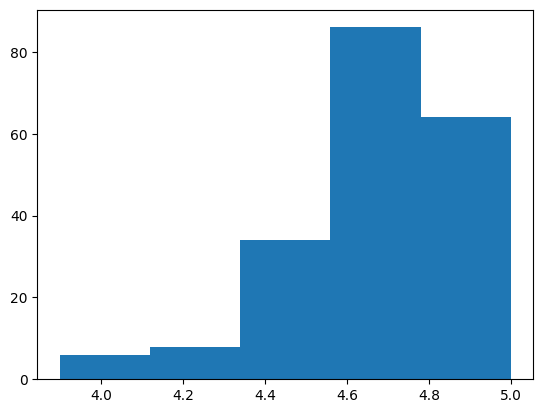

In [86]:
#Análise da distribuição de Rating
plt.hist(coffeeDF['Rating'], bins=5)
#como podemos ver a distribuição é enviesada para a esquerda (left-skewed)

<AxesSubplot: xlabel='Place type', ylabel='Rating'>

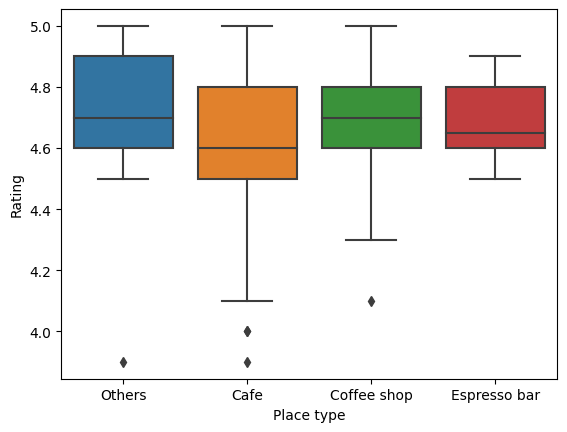

In [88]:
#box plot com outliers
sns.boxplot(x="Place type", y="Rating", data=coffeeDF)

(array([26., 22., 86., 18., 46.]),
 array([4.3 , 4.44, 4.58, 4.72, 4.86, 5.  ]),
 <BarContainer object of 5 artists>)

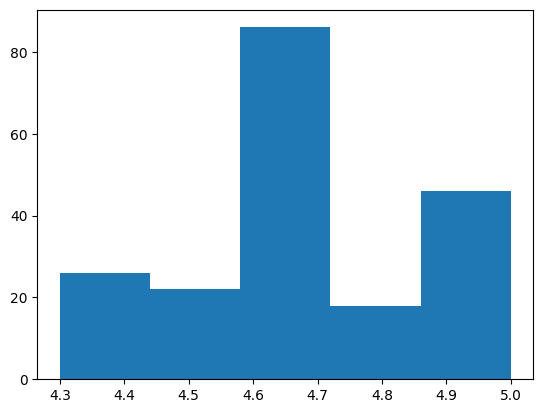

In [95]:
# removendo os outliers
coffeeDF_no = remove_outlier(coffeeDF, 'Rating')

# Plotando novamente
plt.hist(coffeeDF_no['Rating'], bins=5)

<AxesSubplot: xlabel='Place type', ylabel='Rating'>

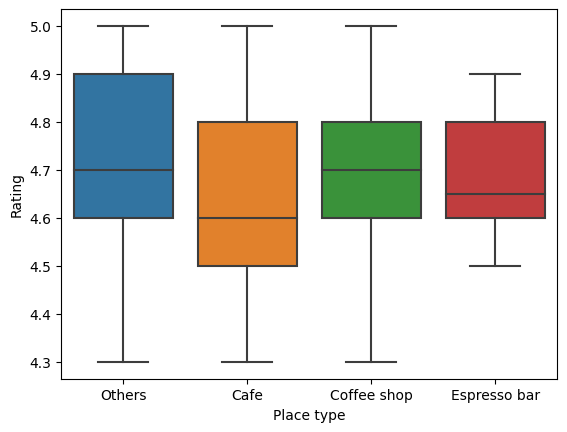

In [96]:
#box plot sem outliers
sns.boxplot(x="Place type", y="Rating", data=coffeeDF_no)

Não mudou muita coisa remover os outliers

#### REVIEW

(array([158.,  27.,   8.,   4.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([3.00000e+00, 8.99700e+02, 1.79640e+03, 2.69310e+03, 3.58980e+03,
        4.48650e+03, 5.38320e+03, 6.27990e+03, 7.17660e+03, 8.07330e+03,
        8.97000e+03, 9.86670e+03, 1.07634e+04, 1.16601e+04, 1.25568e+04,
        1.34535e+04, 1.43502e+04, 1.52469e+04, 1.61436e+04, 1.70403e+04,
        1.79370e+04]),
 <BarContainer object of 20 artists>)

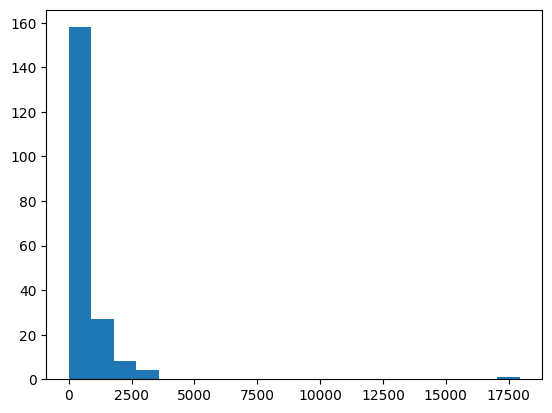

In [97]:
plt.hist(coffeeDF['Reviews'], bins=20)

Analisando a distribuição acima podemos notar que temos um outlier.
Estes attrapalham a analise por se tratarem de valores muito incomuns.

<AxesSubplot: xlabel='Place type', ylabel='Reviews'>

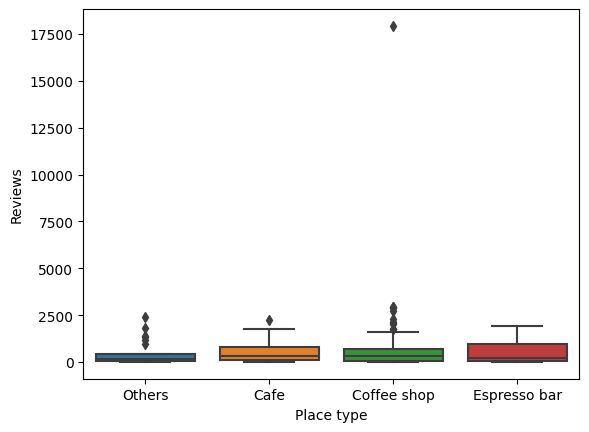

In [98]:
# boxplot com ouliers
sns.boxplot(x="Place type", y='Reviews', data=coffeeDF)

(array([64., 28., 14., 17.,  8.,  7.,  7.,  7.,  6.,  4.,  1.,  3.,  3.,
         4.,  4.,  3.,  2.,  4.,  1., 11.]),
 array([  12.  ,  112.62,  213.24,  313.86,  414.48,  515.1 ,  615.72,
         716.34,  816.96,  917.58, 1018.2 , 1118.82, 1219.44, 1320.06,
        1420.68, 1521.3 , 1621.92, 1722.54, 1823.16, 1923.78, 2024.4 ]),
 <BarContainer object of 20 artists>)

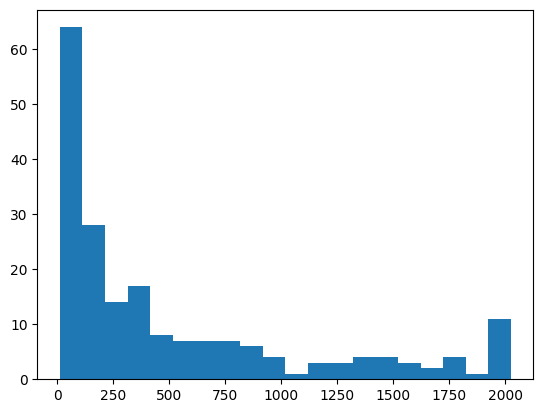

In [99]:
# removendo os outliers
coffeeDF_no = remove_outlier(coffeeDF, 'Reviews')
# ploting the values
plt.hist(coffeeDF_no['Reviews'], bins=20)
# Agora é possivel notar com mais clareza que se trata de uma distribução left skewed

<AxesSubplot: xlabel='Place type', ylabel='Reviews'>

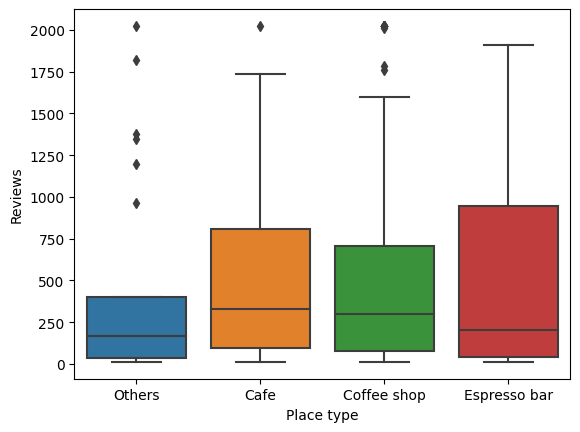

In [101]:
# boxplot "sem" outliers
sns.boxplot(x='Place type', y='Reviews', data= coffeeDF_no)

## Vamos fazer algums agrupamentos para tirar algumas ideias de insight
#### 1 - Quais os restaurantes com mais reviews?
#### 2 - O preço está correlacionado com a avaliação?
#### 3 - Qual o melhor restaurante em nota?

C:\Users\lucad\AppData\Local\Temp\ipykernel_16040\1187980476.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  coffeeDF_no.groupby('Place type').mean()['Rating'].sort_values().plot(kind='bar')


<AxesSubplot: xlabel='Place type'>

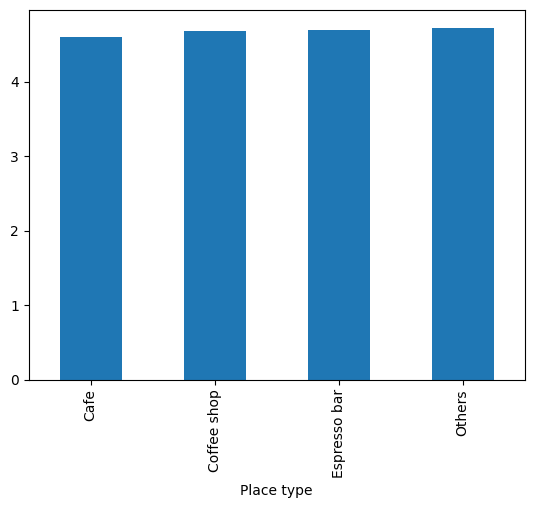

In [63]:
#encontrado os tipos de lugares com maiores médias de avaliação
coffeeDF_no.groupby('Place type').mean()['Rating'].sort_values().plot(kind='bar')

C:\Users\lucad\AppData\Local\Temp\ipykernel_16040\246659244.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  coffeeDF.groupby('Place type').median()['Rating'].sort_values().plot(kind='bar')


<AxesSubplot: xlabel='Place type'>

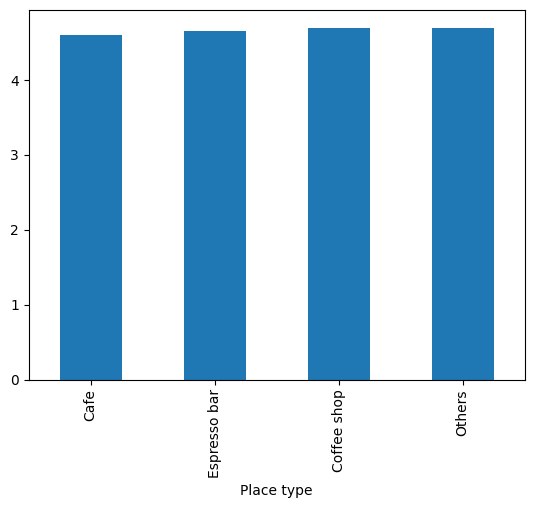

In [40]:
#encontrado os tipos de lugares com maiores medianas de avaliação
coffeeDF.groupby('Place type').median()['Rating'].sort_values().plot(kind='bar')

Não mudou muita coisa alterar de média para mediana

<AxesSubplot: xlabel='Place type'>

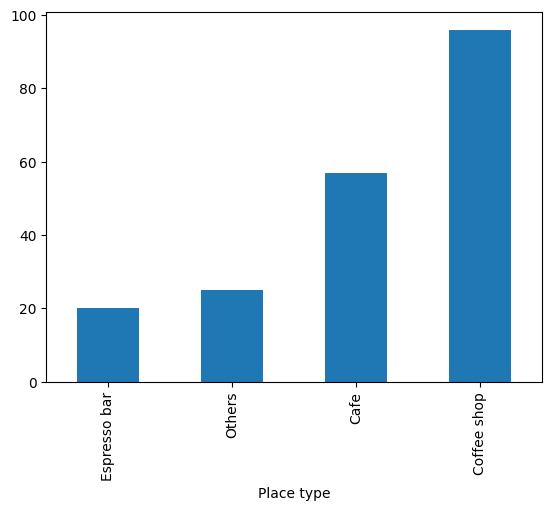

In [64]:
# contando quais são os tipos de lugares com maior numero de estabelecimento
coffeeDF_no.groupby('Place type')['Place type'].count().sort_values().plot(kind='bar')

C:\Users\lucad\AppData\Local\Temp\ipykernel_16040\3310939316.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_reviews = coffeeDF.groupby('Place name').sum()['Reviews'].sort_values(ascending=False)[:10]


<AxesSubplot: xlabel='Place name'>

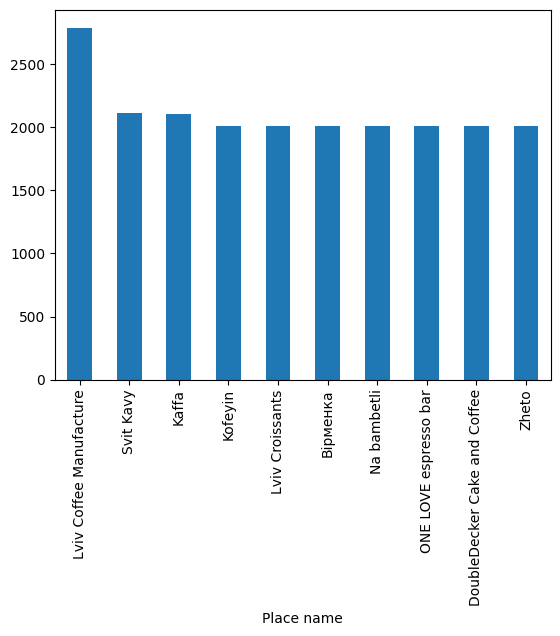

In [68]:
# Buscando a loja melhor avaliada TOP 10
top_reviews = coffeeDF_no.groupby('Place name').sum()['Reviews'].sort_values(ascending=False)[:10]
top_reviews.plot(kind='bar')

A cafeteria Lviv Coffee Manufacture obteve o maior número de reviews

C:\Users\lucad\AppData\Local\Temp\ipykernel_16040\2030490920.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  coffeeDF[coffeeDF['Place name'].isin(top_reviews.index)].groupby('Place type').mean()['Rating'].sort_values().plot(kind='bar')


<AxesSubplot: xlabel='Place type'>

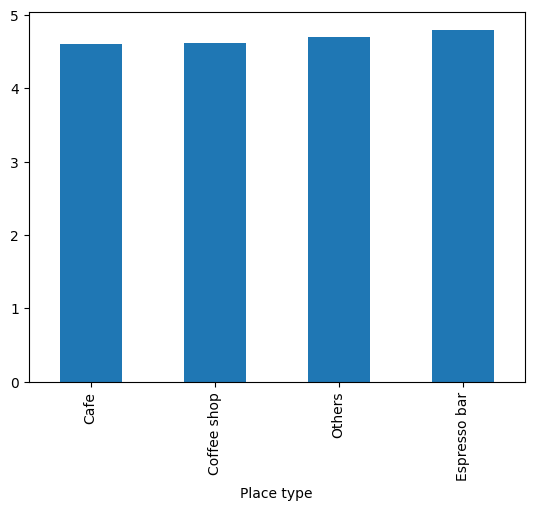

In [69]:
# Descobrindo o tipo que domina entre as top 10 cafeterias
coffeeDF[coffeeDF['Place name'].isin(top_reviews.index)].groupby('Place type').mean()['Rating'].sort_values().plot(kind='bar')

O tipo "Expresso bar" tem a melhor avaliação em media.
Como os outliers foram removidos a média é uma boa medidas.

C:\Users\lucad\AppData\Local\Temp\ipykernel_16040\1865520112.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  coffeeDF[coffeeDF['Place name'].isin(top_reviews.index)].groupby('Place type').median()['Rating'].sort_values().plot(kind='bar')


<AxesSubplot: xlabel='Place type'>

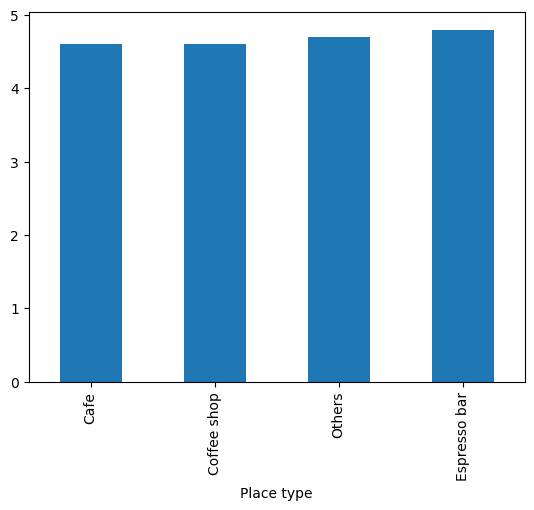

In [70]:
# Descobrindo o tipo que domina entre as top 10 cafeterias
coffeeDF[coffeeDF['Place name'].isin(top_reviews.index)].groupby('Place type').median()['Rating'].sort_values().plot(kind='bar')

### Analise das correlações

In [72]:
coffeeDF_no['RatingLog'] = np.log(coffeeDF_no['Rating'])

C:\Users\lucad\AppData\Local\Temp\ipykernel_16040\2615545143.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(coffeeDF_no.corr())


<AxesSubplot: >

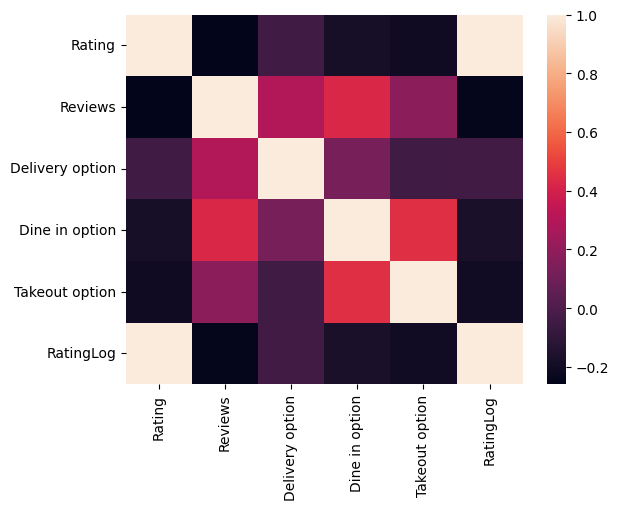

In [73]:
# USANDO O SEABORN
# TENTANDO ENCONTRAR RELAÇÕES NOS DADOS
sns.heatmap(coffeeDF_no.corr())

In [167]:
# Analisando a visualização acima não se nota alguma correlação tão clara
coffeeDF

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,C,Dim Kavu,Others,4.6,206.0,$$,False,False,False
1,C,Коферум,Cafe,5.0,24.0,$$,False,False,True
2,C,Кофейня Світ Чаю,Coffee shop,5.0,11.0,$$,False,False,True
3,C,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,C,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,$$,False,True,True
...,...,...,...,...,...,...,...,...,...
193,H,Artist,Others,4.6,963.0,$$$,False,True,True
194,H,Dream Cafe,Cafe,4.3,646.0,$$,False,True,True
195,H,РУТА КАФЕ ПП КУЛІЧЕНКО К.І.,Cafe,4.6,16.0,$$,False,True,True
196,H,Ob'yektna Kava,Coffee shop,4.7,599.0,$$,False,True,True


In [74]:
import seaborn as sns

<AxesSubplot: xlabel='Place type', ylabel='Rating'>

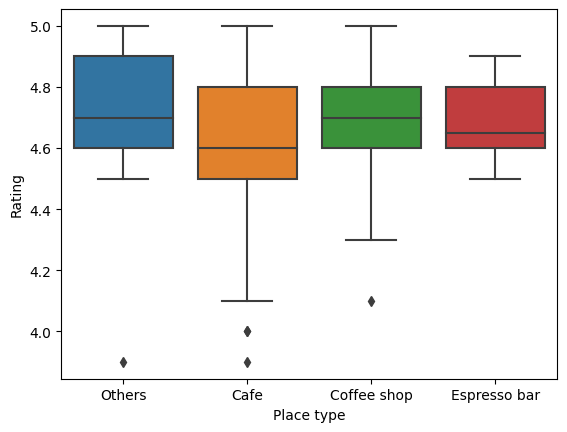

In [77]:
sns.boxplot(x='Place type', y="Rating", data=coffeeDF_no)

<AxesSubplot: xlabel='Place type', ylabel='Reviews'>

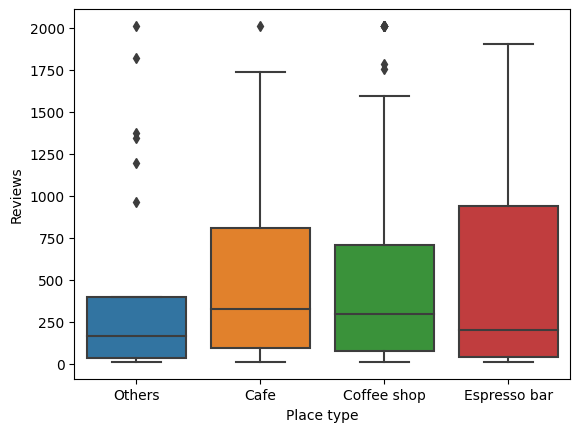

In [79]:
sns.boxplot(x='Place type', y="Reviews", data=coffeeDF_no)